In [2]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import re


In [10]:
file_list = glob.glob('data/token-ring*.csv')
column_names=['passedTimeMs', 'totalProcessedPackages', 'totalLoss', 'totalLatencyMs', 'averageLatency', 'throughput']
print(file_list)

['data/token-ring-linked-queue_10_100_1.csv', 'data/token-ring-test_3_5_1.csv', 'data/token-ring-test_10_100_30.csv', 'data/token-ring-linked-queue_20_50_1.csv', 'data/token-ring-test_3_100_1.csv', 'data/token-ring-test_3_50_1.csv', 'data/token-ring-test_10_5_1.csv', 'data/token-ring-test_20_100_1.csv', 'data/token-ring-test_10_100_80.csv', 'data/token-ring-linked-queue_20_5_1.csv', 'data/token-ring-test_10_50_1.csv', 'data/token-ring-linked-queue_3_100_1.csv', 'data/token-ring-test_20_5_1.csv', 'data/token-ring-test_10_100_300.csv', 'data/token-ring-test_10_100_1.csv', 'data/token-ring-test_20_50_1.csv', 'data/token-ring-linked-queue_10_100_30.csv', 'data/token-ring-linked-queue_10_5_1.csv', 'data/token-ring-linked-queue_10_100_80.csv', 'data/token-ring-linked-queue_3_50_1.csv', 'data/token-ring-linked-queue_10_50_1.csv', 'data/token-ring-linked-queue_3_5_1.csv', 'data/token-ring-linked-queue_20_100_1.csv']


In [11]:
def getDF(file):
    df = pd.read_csv(file , header=None)
    df.columns = column_names
    df = df.loc[df.passedTimeMs < 130000]
    
    return df

def getRunInfo(file):
    run_info = re.search(r"token-ring.+_(\d+)_(\d+)_(\d+)", file)
    
    nodes_nbr = run_info.group(1)
    packages_per_node = run_info.group(2)
    process_per_time = run_info.group(3)
    return nodes_nbr, packages_per_node, process_per_time

def printStat(files, columnName, label):
    df_list = []
    for file in files:
        df = getDF(file)
        df_list.append(df)
        
    plt.figure(figsize=(14, 7))
    for i in range(len(files)):
        nodes_nbr, packages_per_node, process_per_time = getRunInfo(files[i])
        plt.scatter(df_list[i].passedTimeMs, df_list[i][columnName], label="{} {} {} {}".format(label, nodes_nbr, packages_per_node, process_per_time))
    
    plt.legend(loc='upper left', fontsize=12)
    plt.ylabel(label)
    plt.xlabel('time (ms)')
    plt.show()

def printAllStatsByTime(files):
    for i in range(1, len(column_names)):
        printStat(files, column_names[i], column_names[i])
    


## Зависимость характеристик от времени

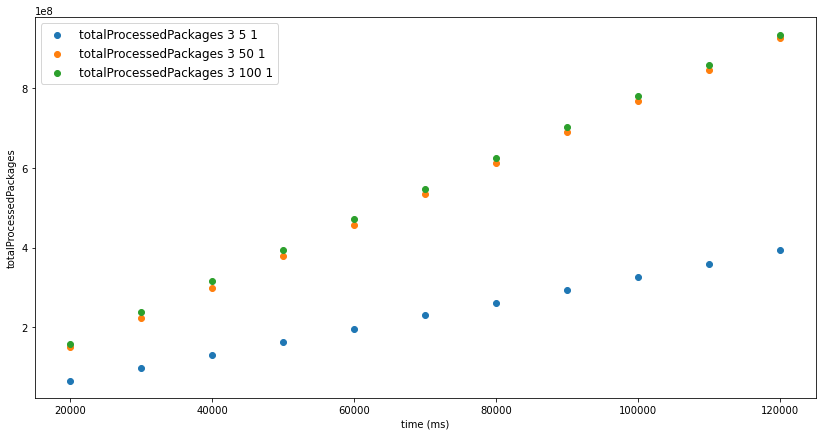

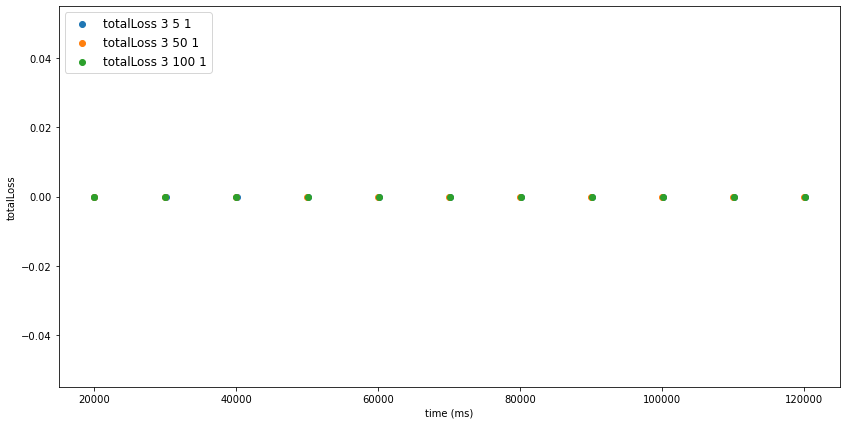

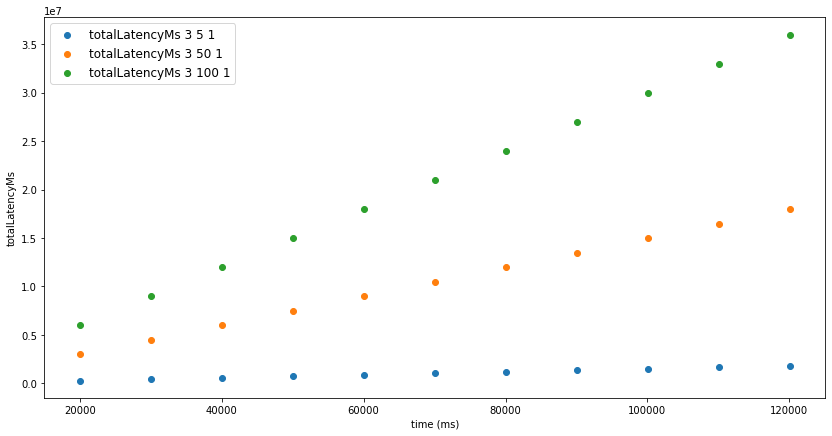

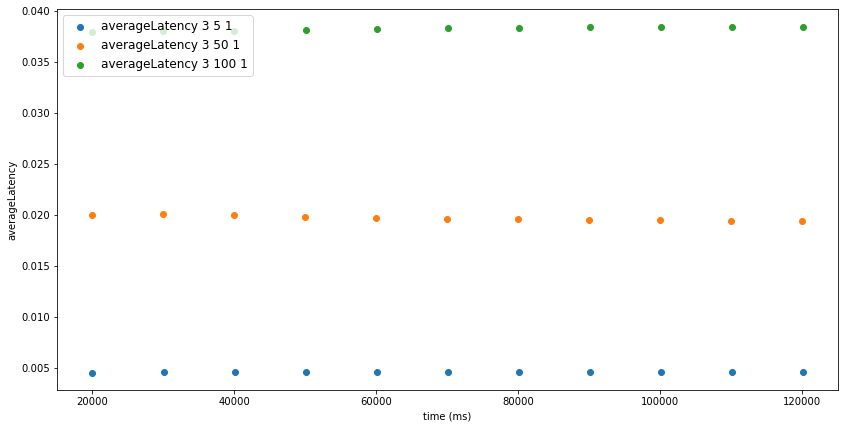

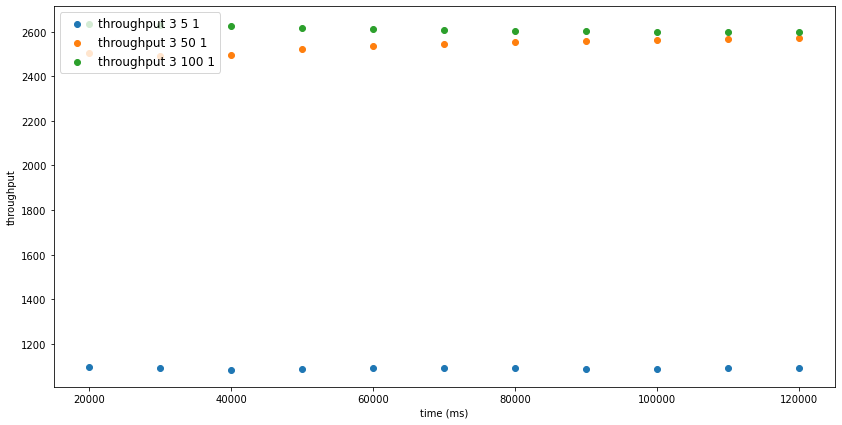

In [12]:
printAllStatsByTime([
    'data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_3_50_1.csv',
    'data/token-ring-test_3_100_1.csv'
])

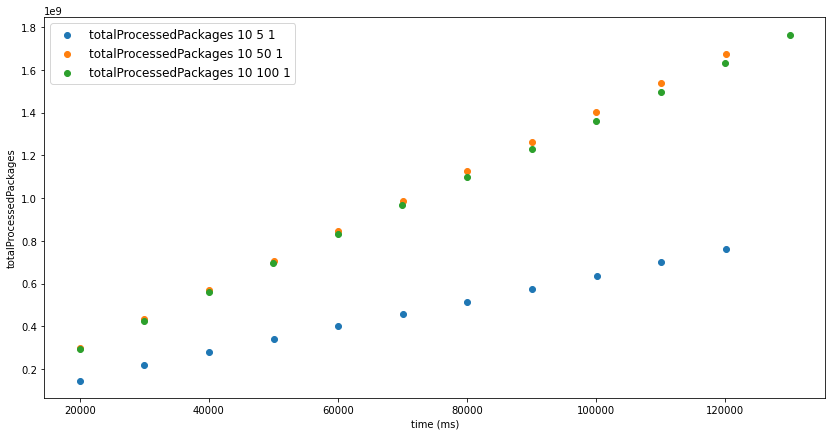

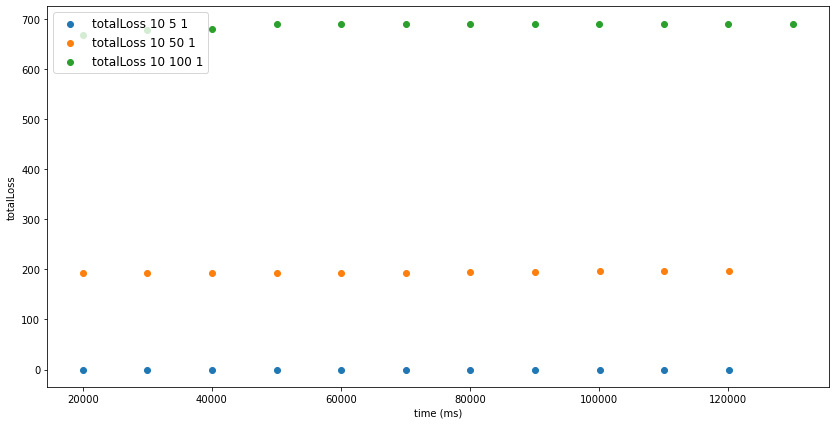

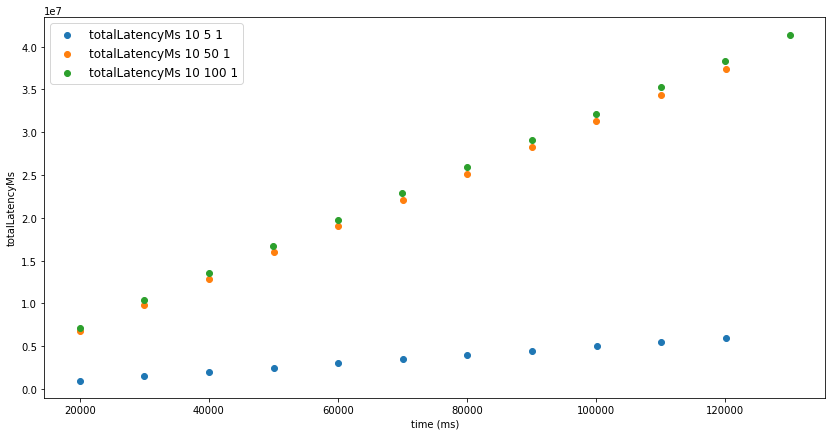

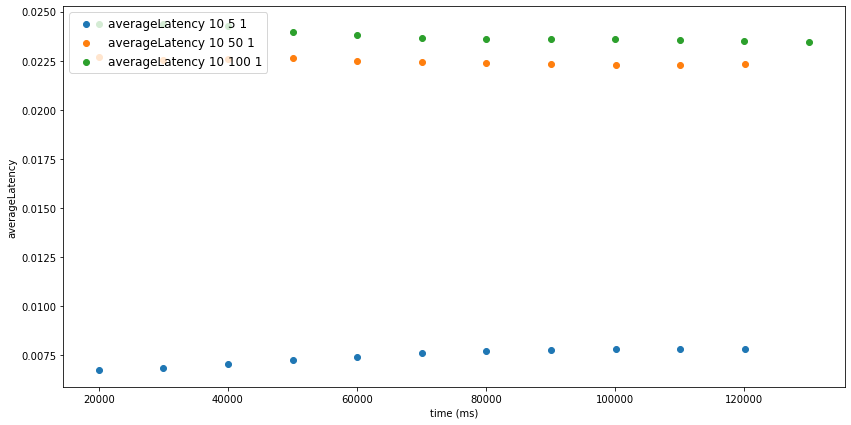

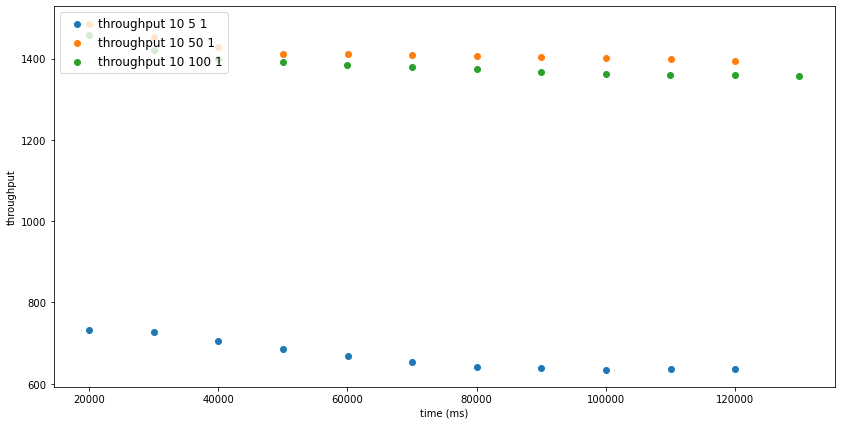

In [15]:
printAllStatsByTime([
    'data/token-ring-test_10_5_1.csv',
    'data/token-ring-test_10_50_1.csv',
    'data/token-ring-test_10_100_1.csv'
])

для 500 и 1000 пакетов в кольце счетчик переполняется при времени 150_000 мс

## Зависимость средних характеристик от числа узлов

In [83]:
def plotAverageStats(file_series, column_name, useCustomLabels = False, custom_labels = []):
    plt.figure(figsize=(14, 7))
    i = 0
    for files in file_series:
        value_list = []
        nodes_list = []
        for file in files:
            df = getDF(file)
            value_list.append(df[column_name].iloc[df.shape[0] - 1])
            nodes_nbr, packages_per_node, process_per_time = getRunInfo(file)
            nodes_list.append(nodes_nbr)

        if (useCustomLabels):
            label_name = "{}: {}. packages_per_node: {}".format(custom_labels[i], column_name, packages_per_node)
            i += 1
        else:
            label_name = "{}. packages_per_node: {}".format(column_name, packages_per_node)
        plt.plot(nodes_list, value_list, label=label_name)

    plt.legend(loc='upper left', fontsize=12)
    plt.ylabel(column_name)
    plt.xlabel('nodes number')
    plt.show()

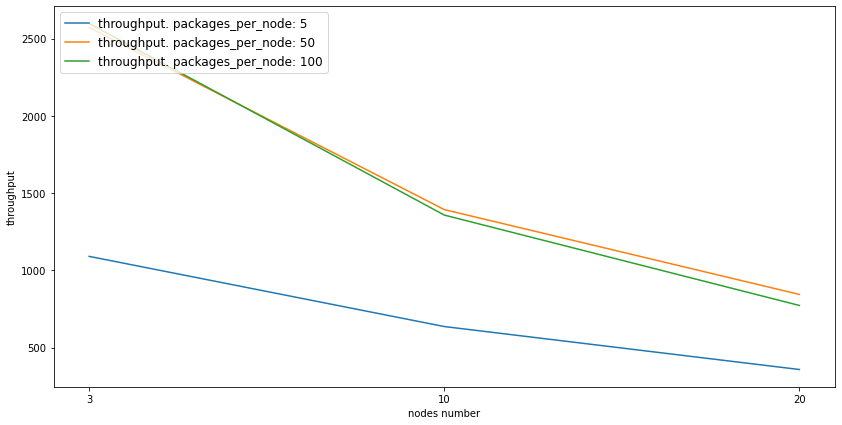

In [20]:
plotAverageStats([
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_10_5_1.csv',
     'data/token-ring-test_20_5_1.csv'],
    ['data/token-ring-test_3_50_1.csv',
    'data/token-ring-test_10_50_1.csv',
     'data/token-ring-test_20_50_1.csv'],
    ['data/token-ring-test_3_100_1.csv',
    'data/token-ring-test_10_100_1.csv',
     'data/token-ring-test_20_100_1.csv'],
],'throughput')

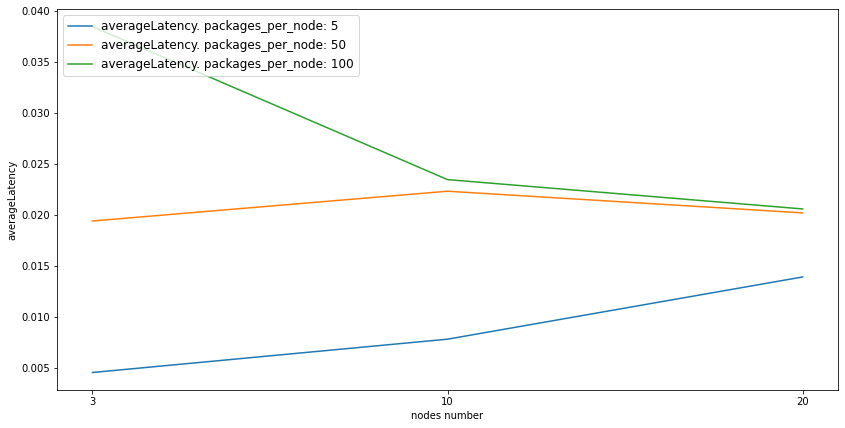

In [21]:
plotAverageStats([
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_10_5_1.csv',
     'data/token-ring-test_20_5_1.csv'],
    ['data/token-ring-test_3_50_1.csv',
    'data/token-ring-test_10_50_1.csv',
     'data/token-ring-test_20_50_1.csv'],
    ['data/token-ring-test_3_100_1.csv',
    'data/token-ring-test_10_100_1.csv',
     'data/token-ring-test_20_100_1.csv'],
],'averageLatency')

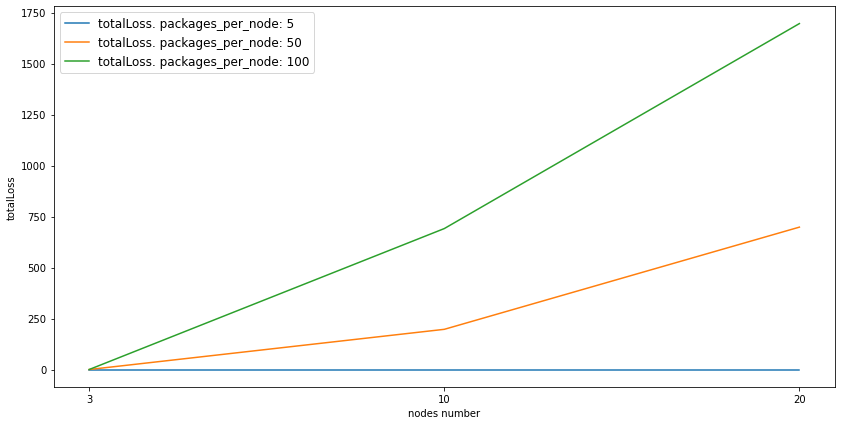

In [22]:
plotAverageStats([
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_10_5_1.csv',
     'data/token-ring-test_20_5_1.csv'],
    ['data/token-ring-test_3_50_1.csv',
    'data/token-ring-test_10_50_1.csv',
     'data/token-ring-test_20_50_1.csv'],
    ['data/token-ring-test_3_100_1.csv',
    'data/token-ring-test_10_100_1.csv',
     'data/token-ring-test_20_100_1.csv'],
],'totalLoss')

## Средние значения в зависимости от числа пакетов

In [53]:
def plotAverageStatsByPacketNumber(file_series, column_name, useCustomLabels = False, custom_labels = []):
    plt.figure(figsize=(14, 7))
    i = 0
    for files in file_series:
        value_list = []
        nodes_list = []
        for file in files:
            df = getDF(file)
            value_list.append(df[column_name].iloc[df.shape[0] - 1])
            nodes_nbr, packages_per_node, process_per_time = getRunInfo(file)
            nodes_list.append(packages_per_node)

        if (useCustomLabels):
            label_name = "{}: {}. nodes_nbr: {}".format(custom_labels[i], column_name, nodes_nbr)
            i += 1
        else:
            label_name = "{}. nodes_nbr: {}".format(column_name, nodes_nbr)
            
        plt.plot(nodes_list, value_list, label=label_name)

    plt.legend(loc='upper left', fontsize=12)
    plt.ylabel(column_name)
    plt.xlabel('packages per node')
    plt.show()

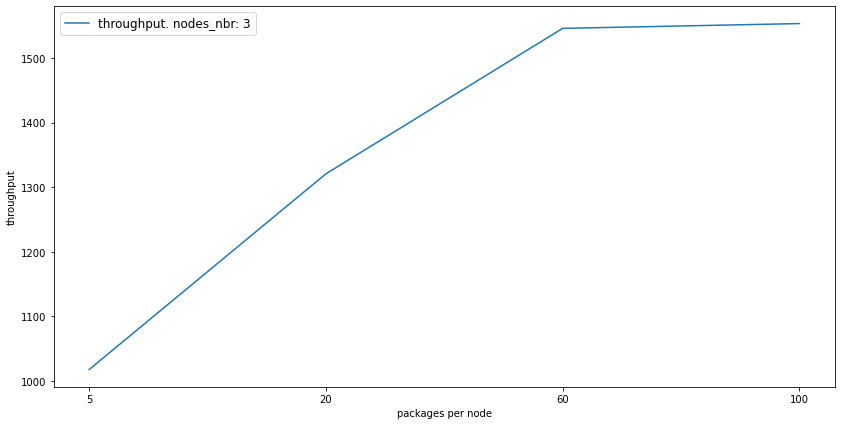

In [56]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_3_20_1.csv',
     'data/token-ring-test_3_60_1.csv',
    'data/token-ring-test_3_100_1.csv']
],'throughput')

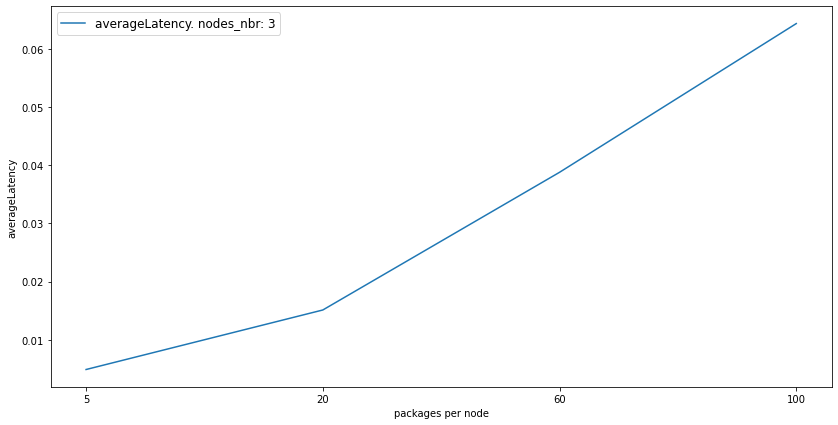

In [90]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_3_20_1.csv',
     'data/token-ring-test_3_60_1.csv',
    'data/token-ring-test_3_100_1.csv']
],'averageLatency')

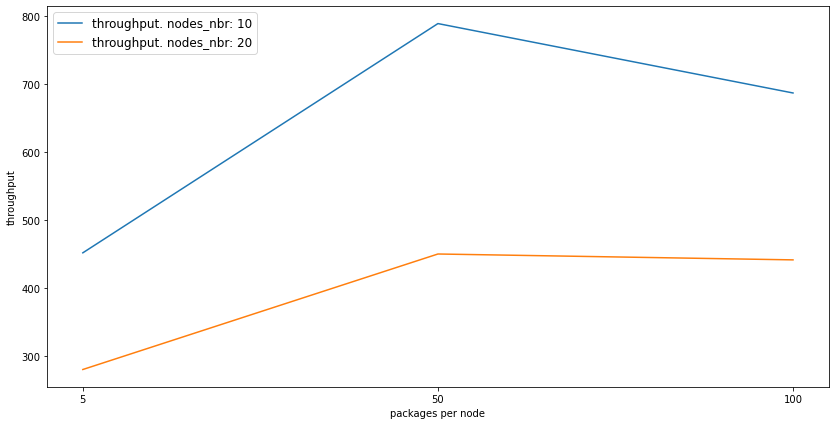

In [60]:
plotAverageStatsByPacketNumber(
    [['data/token-ring-test_10_5_1.csv',
    'data/token-ring-test_10_50_1.csv',
     'data/token-ring-test_10_100_1.csv'],
    ['data/token-ring-test_20_5_1.csv',
    'data/token-ring-test_20_50_1.csv',
     'data/token-ring-test_20_100_1.csv']],'throughput')

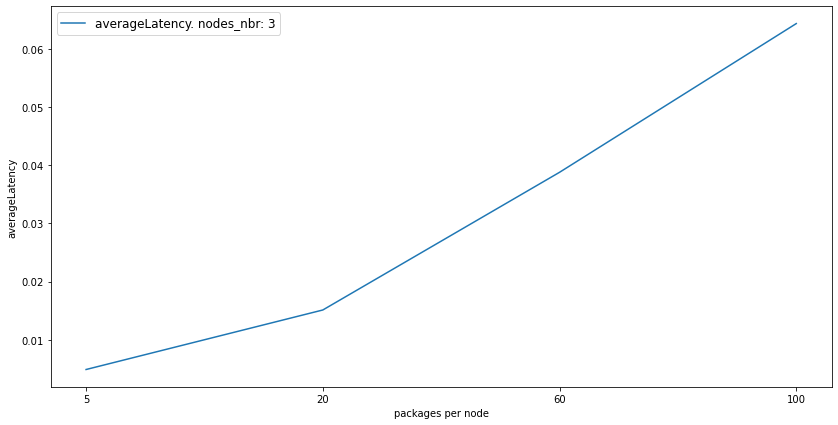

In [61]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_3_20_1.csv',
     'data/token-ring-test_3_60_1.csv',
    'data/token-ring-test_3_100_1.csv']
],'averageLatency')

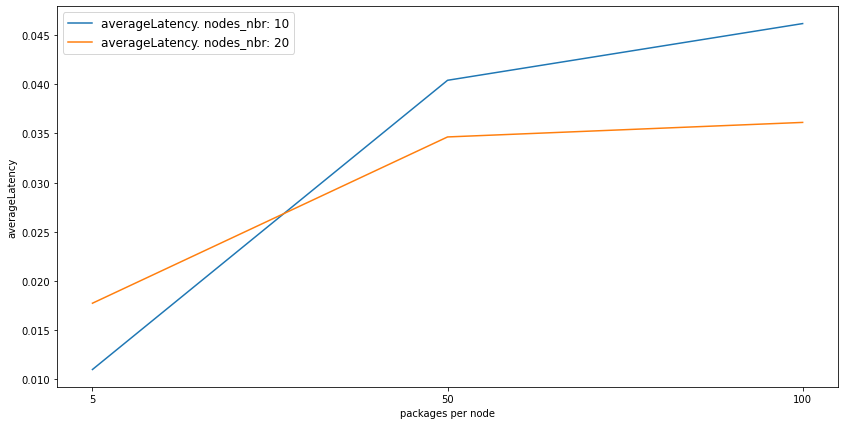

In [62]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-test_10_5_1.csv',
    'data/token-ring-test_10_50_1.csv',
     'data/token-ring-test_10_100_1.csv'],
    ['data/token-ring-test_20_5_1.csv',
    'data/token-ring-test_20_50_1.csv',
     'data/token-ring-test_20_100_1.csv']
],'averageLatency')

тут происходит перелом из-за потери пакетов

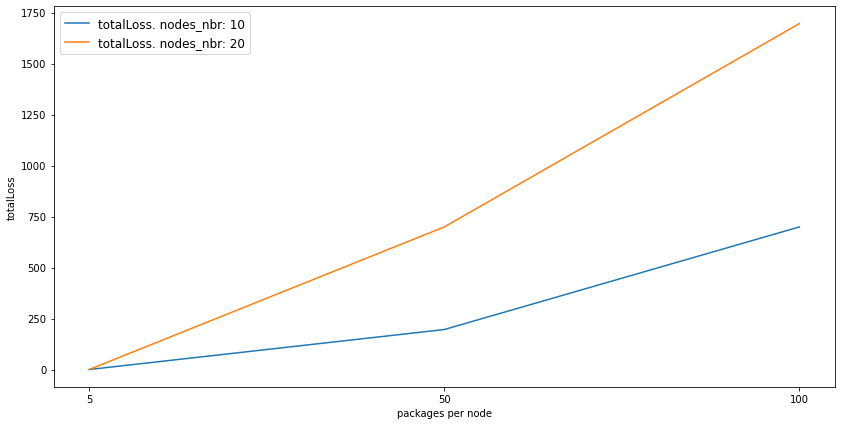

In [63]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-test_10_5_1.csv',
    'data/token-ring-test_10_50_1.csv',
     'data/token-ring-test_10_100_1.csv'],
    ['data/token-ring-test_20_5_1.csv',
    'data/token-ring-test_20_50_1.csv',
     'data/token-ring-test_20_100_1.csv']
],'totalLoss')

## Средние величины в зависимости от process_per_time

In [29]:
def plotAverageStatsByProcessPerTime(files, column_name):
    plt.figure(figsize=(14, 7))
    
    value_list = []
    nodes_list = []
    for file in files:
        df = getDF(file)
        value_list.append(df[column_name].iloc[df.shape[0] -1])
        nodes_nbr, packages_per_node, process_per_time = getRunInfo(file)
        nodes_list.append(process_per_time)

    label_name = "{}. nodes_nbr: {}, packages per node: {}".format(column_name, nodes_nbr, packages_per_node)
    plt.scatter(nodes_list, value_list, label=label_name)
    plt.legend(loc='upper left', fontsize=12)
    plt.ylabel(column_name)
    plt.xlabel('process_per_time')
    plt.show()

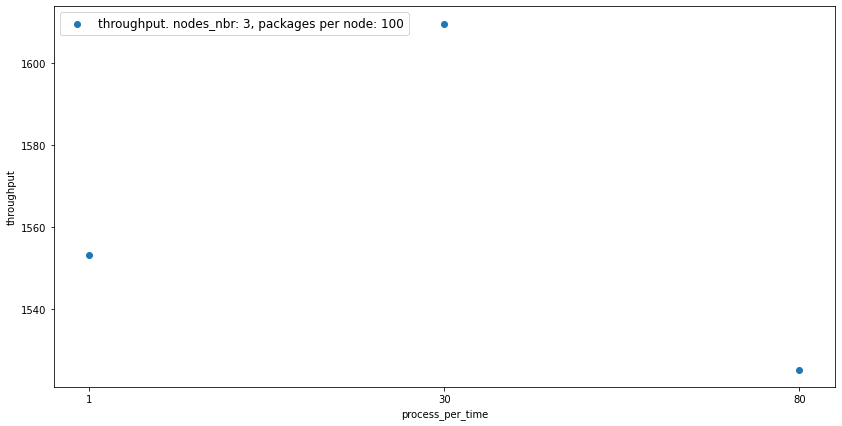

In [70]:
plotAverageStatsByProcessPerTime(
    ['data/token-ring-test_3_100_1.csv',
    'data/token-ring-test_3_100_30.csv',
    'data/token-ring-test_3_100_80.csv'],'throughput')

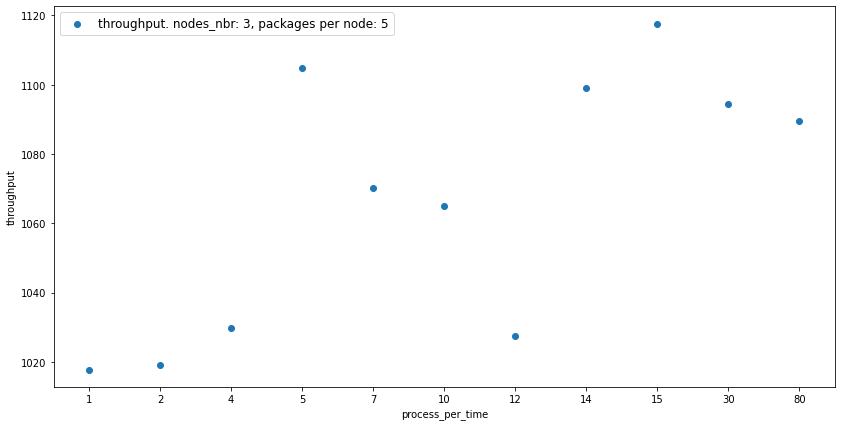

In [97]:
plotAverageStatsByProcessPerTime(
    ['data/token-ring-test_3_5_1.csv',
     'data/token-ring-test_3_5_2.csv',
     'data/token-ring-test_3_5_4.csv',
    'data/token-ring-test_3_5_5.csv',
     'data/token-ring-test_3_5_7.csv',
     'data/token-ring-test_3_5_10.csv',
     'data/token-ring-test_3_5_12.csv',
    'data/token-ring-test_3_5_14.csv',
    'data/token-ring-test_3_5_15.csv',
    'data/token-ring-test_3_5_30.csv',
    'data/token-ring-test_3_5_80.csv'],'throughput')

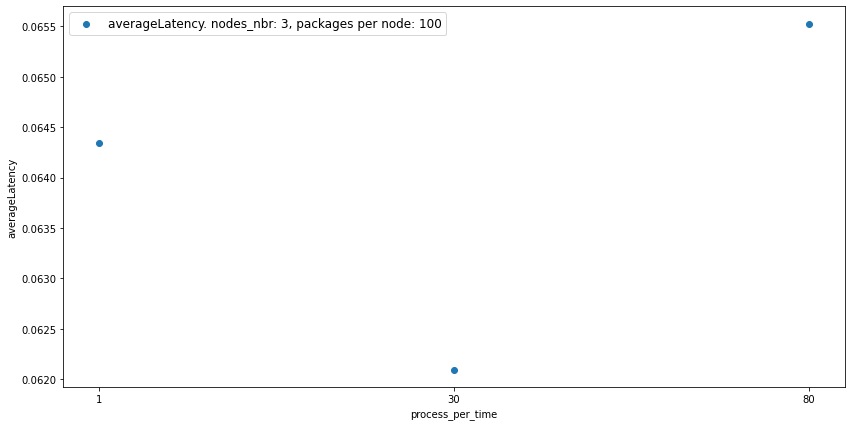

In [71]:
plotAverageStatsByProcessPerTime(
    ['data/token-ring-test_3_100_1.csv',
    'data/token-ring-test_3_100_30.csv',
    'data/token-ring-test_3_100_80.csv'],'averageLatency')

Видно, что process_per_time немного улучшает пропускную способность и уменьшает latency, но при большом значении не оказывает ухудшает работу

## Реализация с LinkedBlockingQueue (пакеты не теряются)

### Характеристики от времени

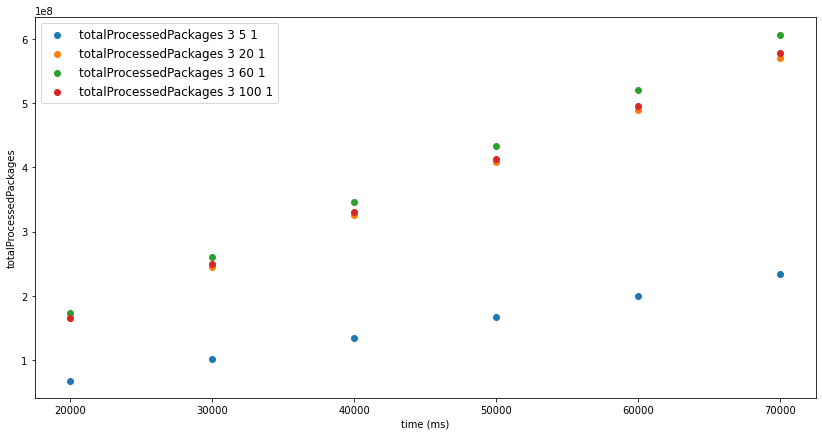

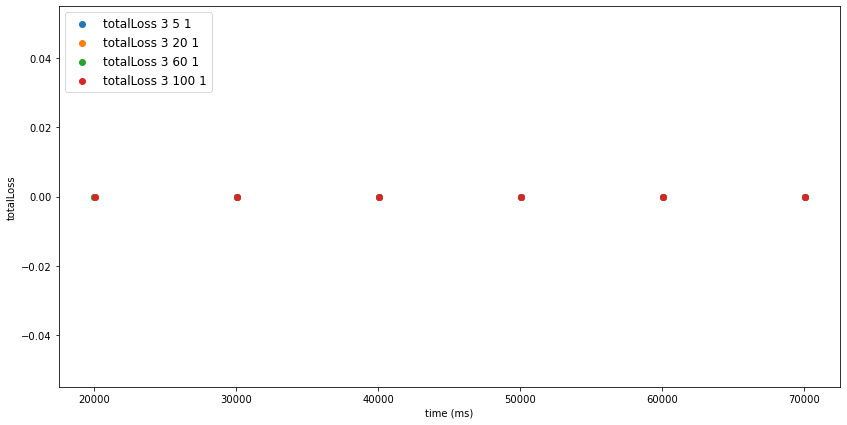

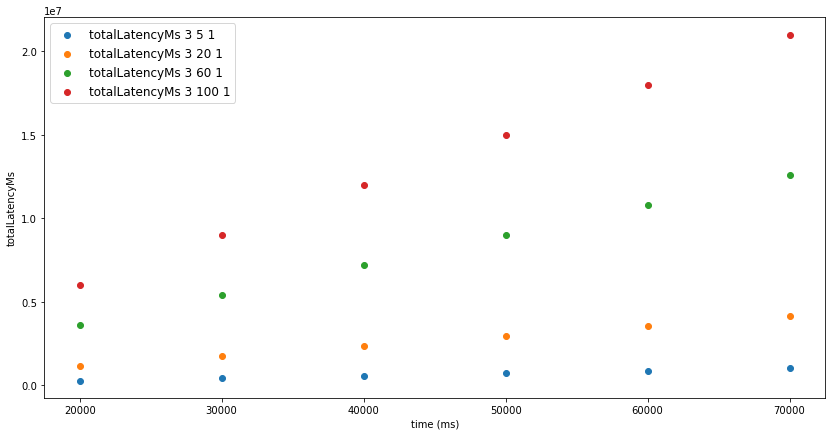

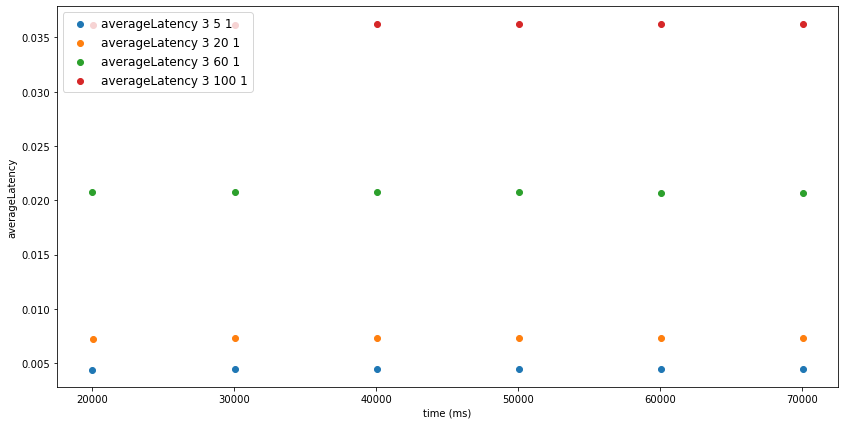

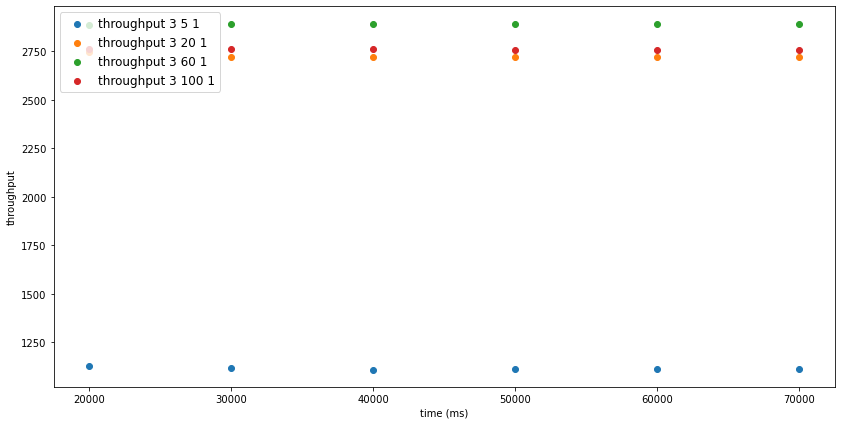

In [64]:
printAllStatsByTime([
    'data/token-ring-linked-queue_3_5_1.csv',
    'data/token-ring-linked-queue_3_20_1.csv',
    'data/token-ring-linked-queue_3_60_1.csv',
    'data/token-ring-linked-queue_3_100_1.csv'
])

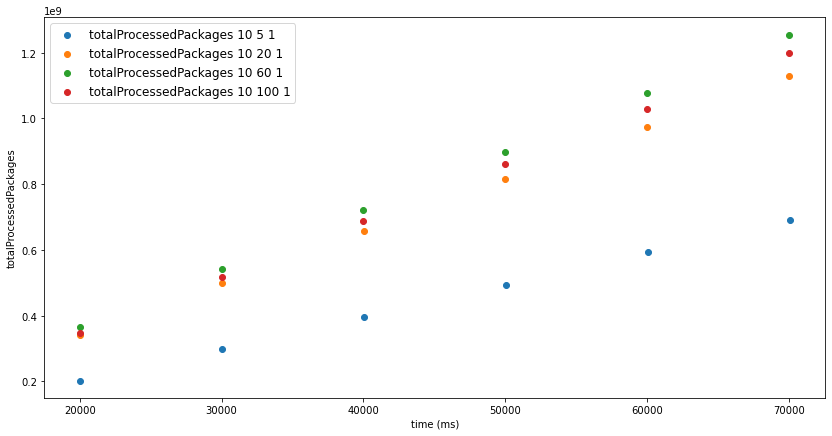

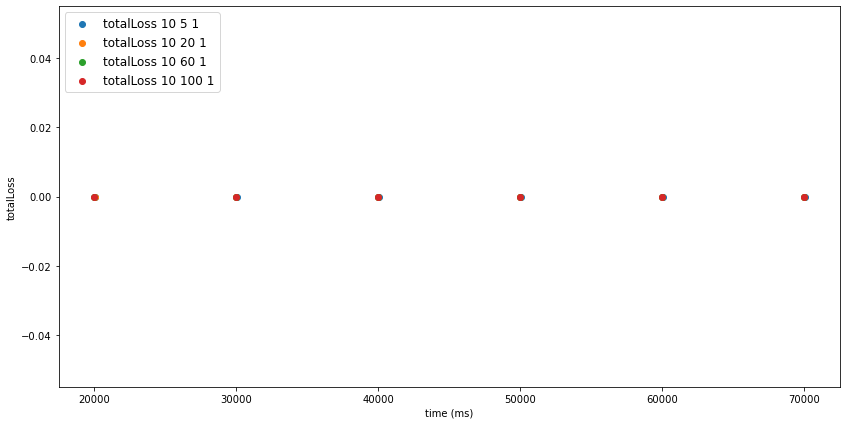

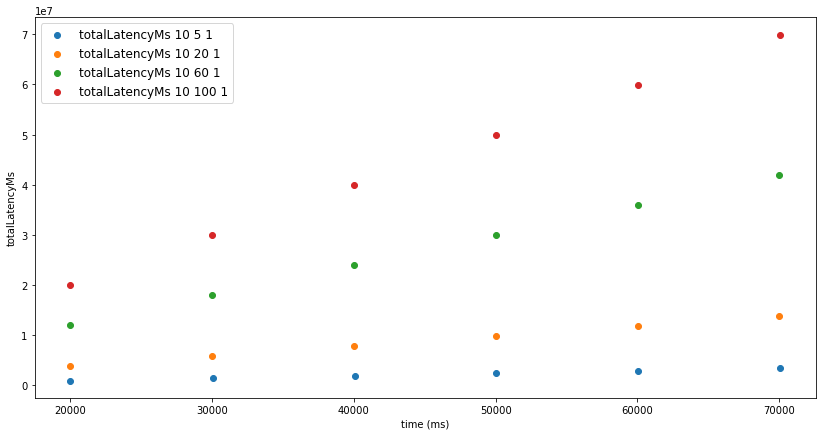

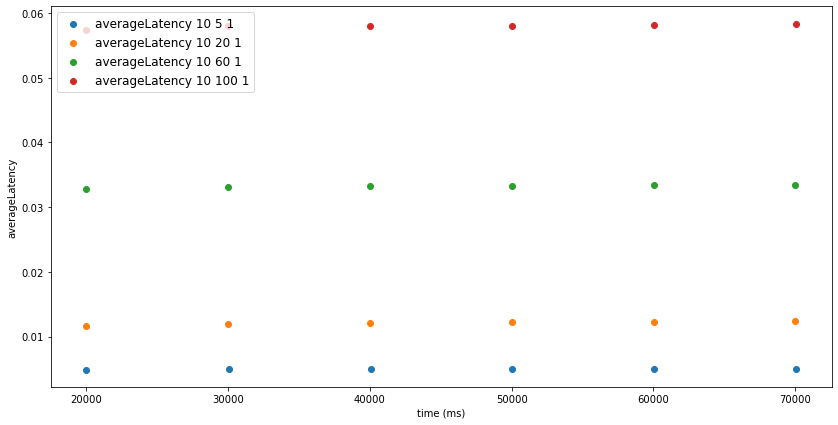

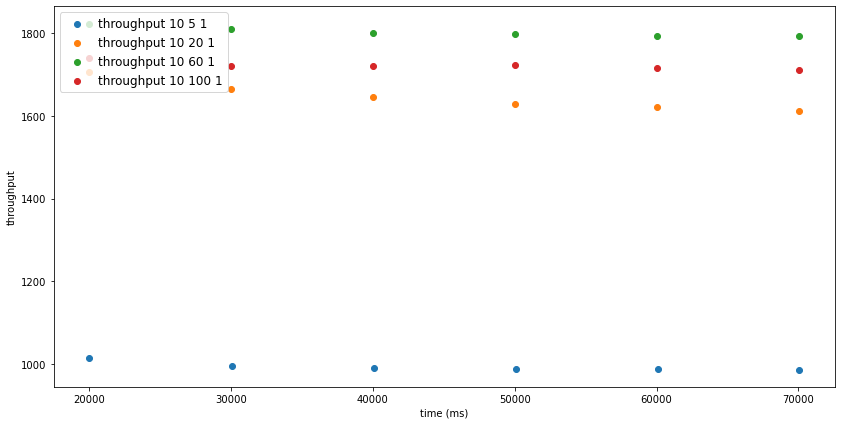

In [65]:
printAllStatsByTime([
    'data/token-ring-linked-queue_10_5_1.csv',
    'data/token-ring-linked-queue_10_20_1.csv',
    'data/token-ring-linked-queue_10_60_1.csv',
    'data/token-ring-linked-queue_10_100_1.csv'
])

### Зависимость средних характеристик от числа узлов

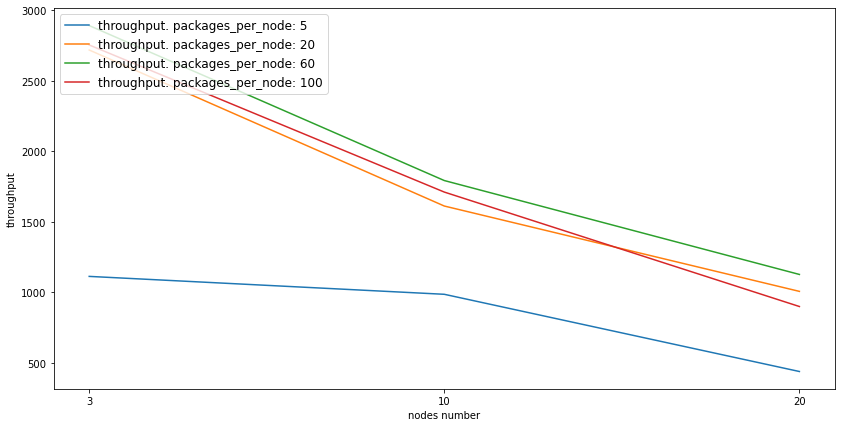

In [66]:
plotAverageStats([
    ['data/token-ring-linked-queue_3_5_1.csv',
    'data/token-ring-linked-queue_10_5_1.csv',
     'data/token-ring-linked-queue_20_5_1.csv'],
    ['data/token-ring-linked-queue_3_20_1.csv',
    'data/token-ring-linked-queue_10_20_1.csv',
     'data/token-ring-linked-queue_20_20_1.csv'],
    ['data/token-ring-linked-queue_3_60_1.csv',
    'data/token-ring-linked-queue_10_60_1.csv',
     'data/token-ring-linked-queue_20_60_1.csv'],
    ['data/token-ring-linked-queue_3_100_1.csv',
    'data/token-ring-linked-queue_10_100_1.csv',
     'data/token-ring-linked-queue_20_100_1.csv'],
],'throughput')

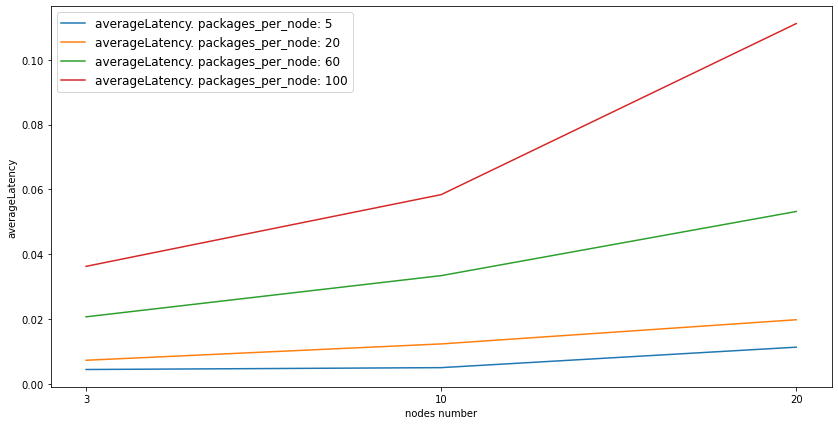

In [67]:
plotAverageStats([
    ['data/token-ring-linked-queue_3_5_1.csv',
    'data/token-ring-linked-queue_10_5_1.csv',
     'data/token-ring-linked-queue_20_5_1.csv'],
    ['data/token-ring-linked-queue_3_20_1.csv',
    'data/token-ring-linked-queue_10_20_1.csv',
     'data/token-ring-linked-queue_20_20_1.csv'],
    ['data/token-ring-linked-queue_3_60_1.csv',
    'data/token-ring-linked-queue_10_60_1.csv',
     'data/token-ring-linked-queue_20_60_1.csv'],
    ['data/token-ring-linked-queue_3_100_1.csv',
    'data/token-ring-linked-queue_10_100_1.csv',
     'data/token-ring-linked-queue_20_100_1.csv'],
],'averageLatency')

### Средние значения в зависимости от числа пакетов

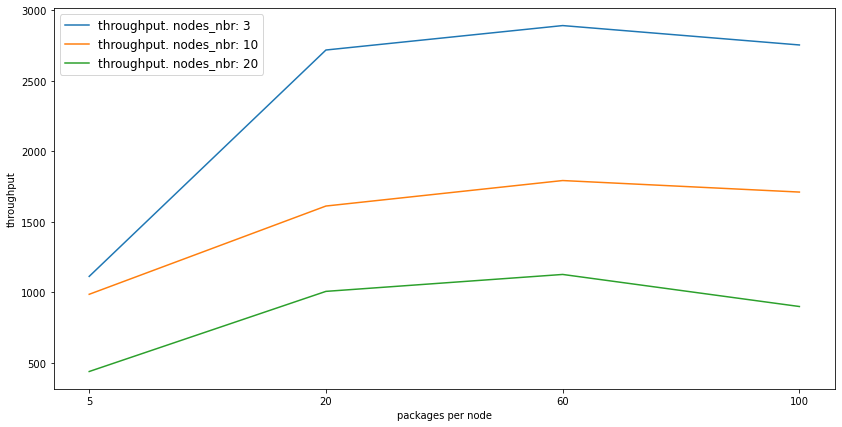

In [68]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-linked-queue_3_5_1.csv',
    'data/token-ring-linked-queue_3_20_1.csv',
     'data/token-ring-linked-queue_3_60_1.csv',
    'data/token-ring-linked-queue_3_100_1.csv'],
    ['data/token-ring-linked-queue_10_5_1.csv',
    'data/token-ring-linked-queue_10_20_1.csv',
     'data/token-ring-linked-queue_10_60_1.csv',
     'data/token-ring-linked-queue_10_100_1.csv'],
    ['data/token-ring-linked-queue_20_5_1.csv',
    'data/token-ring-linked-queue_20_20_1.csv',
     'data/token-ring-linked-queue_20_60_1.csv',
     'data/token-ring-linked-queue_20_100_1.csv']
],'throughput')

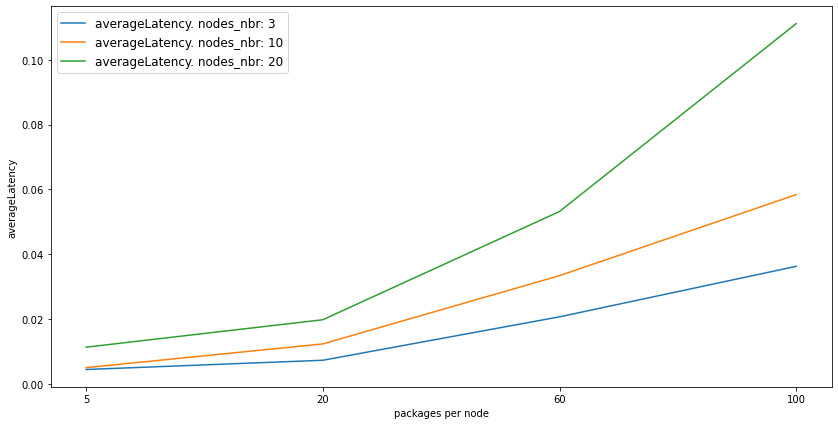

In [69]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-linked-queue_3_5_1.csv',
    'data/token-ring-linked-queue_3_20_1.csv',
     'data/token-ring-linked-queue_3_60_1.csv',
    'data/token-ring-linked-queue_3_100_1.csv'],
    ['data/token-ring-linked-queue_10_5_1.csv',
    'data/token-ring-linked-queue_10_20_1.csv',
     'data/token-ring-linked-queue_10_60_1.csv',
     'data/token-ring-linked-queue_10_100_1.csv'],
    ['data/token-ring-linked-queue_20_5_1.csv',
    'data/token-ring-linked-queue_20_20_1.csv',
     'data/token-ring-linked-queue_20_60_1.csv',
     'data/token-ring-linked-queue_20_100_1.csv']
],'averageLatency')

### Средние величины в зависимости от process_per_time

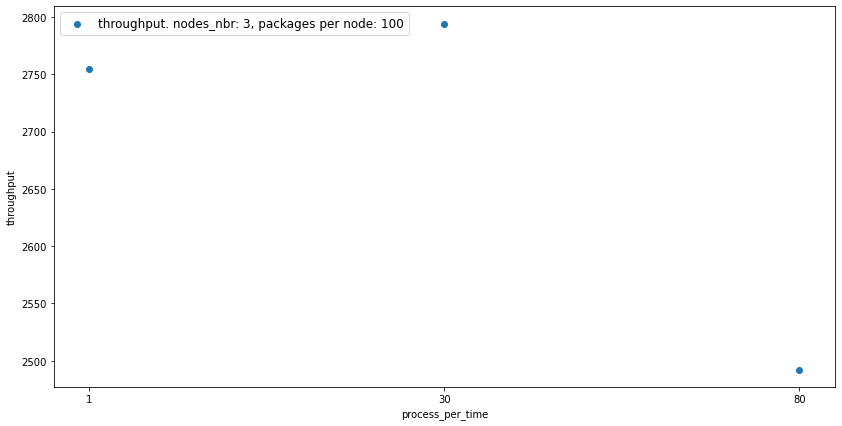

In [73]:
plotAverageStatsByProcessPerTime(
    ['data/token-ring-linked-queue_3_100_1.csv',
    'data/token-ring-linked-queue_3_100_30.csv',
    'data/token-ring-linked-queue_3_100_80.csv'],'throughput')

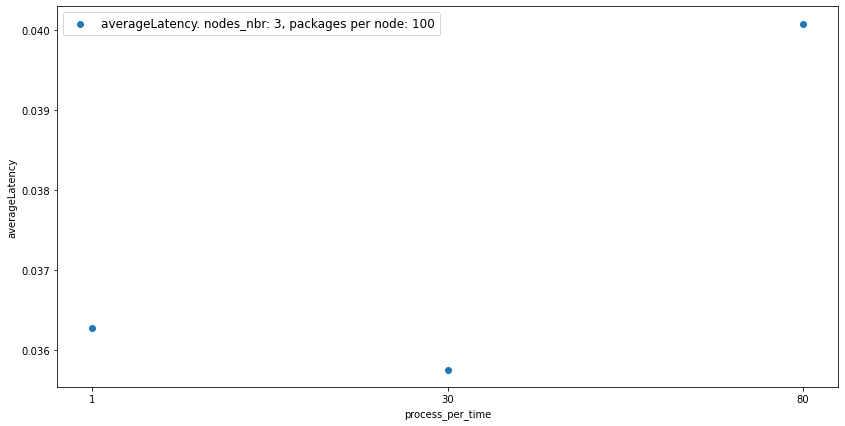

In [74]:
plotAverageStatsByProcessPerTime(
    ['data/token-ring-linked-queue_3_100_1.csv',
    'data/token-ring-linked-queue_3_100_30.csv',
    'data/token-ring-linked-queue_3_100_80.csv'],'averageLatency')

Для LinkedBlockingDeque лучше подходит process_per_time = 1

# Сравнение LinkedBlockingQueue и ArrayBlockingQueue

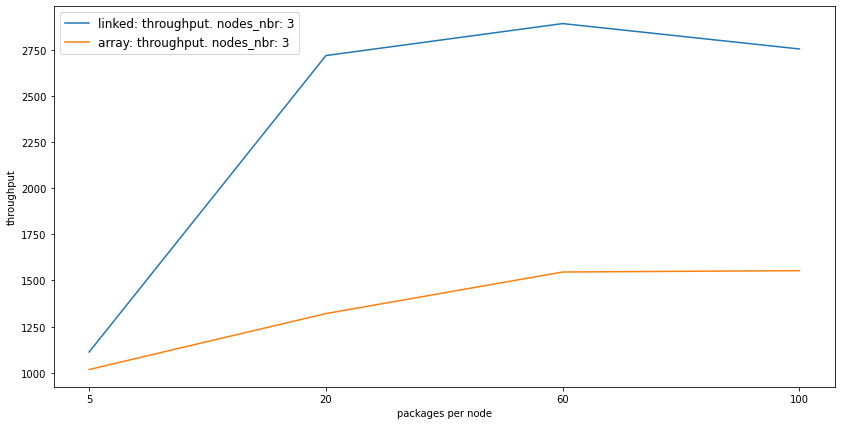

In [76]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-linked-queue_3_5_1.csv',
     'data/token-ring-linked-queue_3_20_1.csv',
    'data/token-ring-linked-queue_3_60_1.csv',
    'data/token-ring-linked-queue_3_100_1.csv'],
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_3_20_1.csv',
     'data/token-ring-test_3_60_1.csv',
    'data/token-ring-test_3_100_1.csv']
],'throughput', True, ['linked', 'array'])

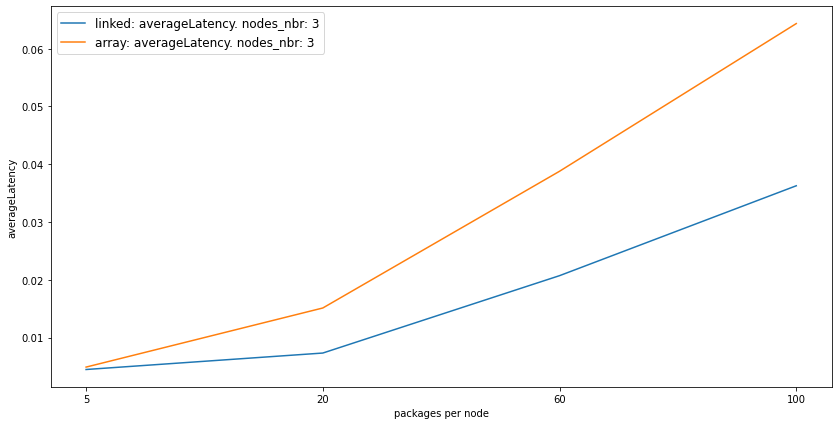

In [77]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-linked-queue_3_5_1.csv',
     'data/token-ring-linked-queue_3_20_1.csv',
    'data/token-ring-linked-queue_3_60_1.csv',
    'data/token-ring-linked-queue_3_100_1.csv'],
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_3_20_1.csv',
     'data/token-ring-test_3_60_1.csv',
    'data/token-ring-test_3_100_1.csv']
],'averageLatency', True, ['linked', 'array'])

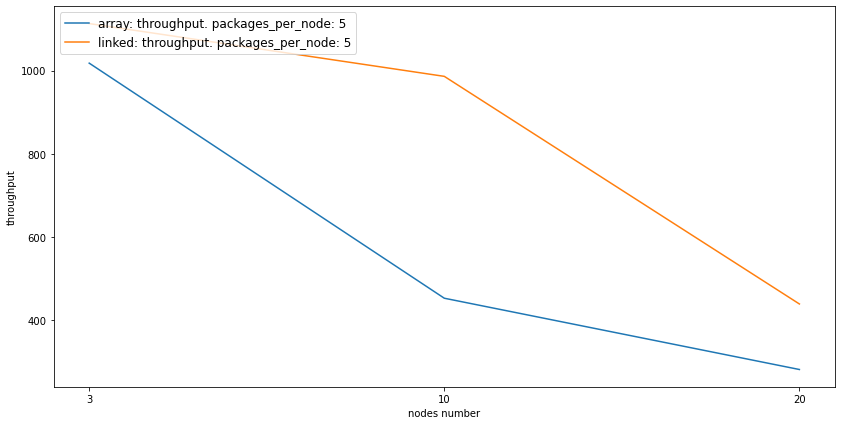

In [88]:
plotAverageStats([
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_10_5_1.csv',
     'data/token-ring-test_20_5_1.csv'],
    ['data/token-ring-linked-queue_3_5_1.csv',
    'data/token-ring-linked-queue_10_5_1.csv',
     'data/token-ring-linked-queue_20_5_1.csv']
],'throughput', True, ['array', 'linked'])

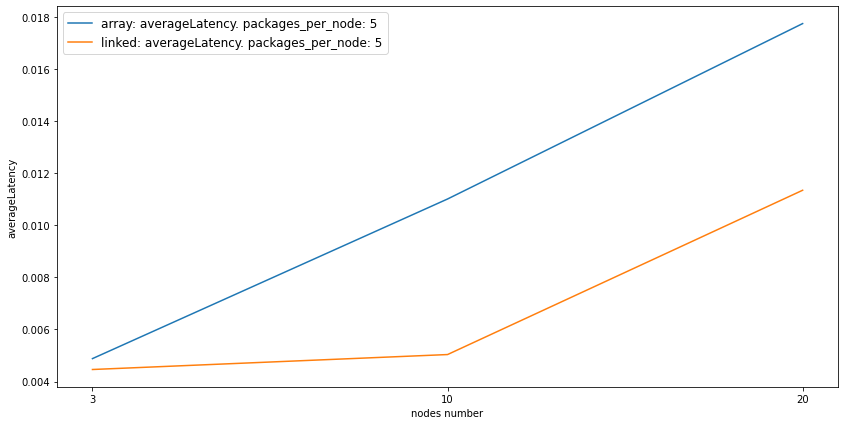

In [87]:
plotAverageStats([
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_10_5_1.csv',
     'data/token-ring-test_20_5_1.csv'],
    ['data/token-ring-linked-queue_3_5_1.csv',
    'data/token-ring-linked-queue_10_5_1.csv',
     'data/token-ring-linked-queue_20_5_1.csv']
],'averageLatency', True, ['array', 'linked'])

### Сравнение с  process_per_time = total packet number

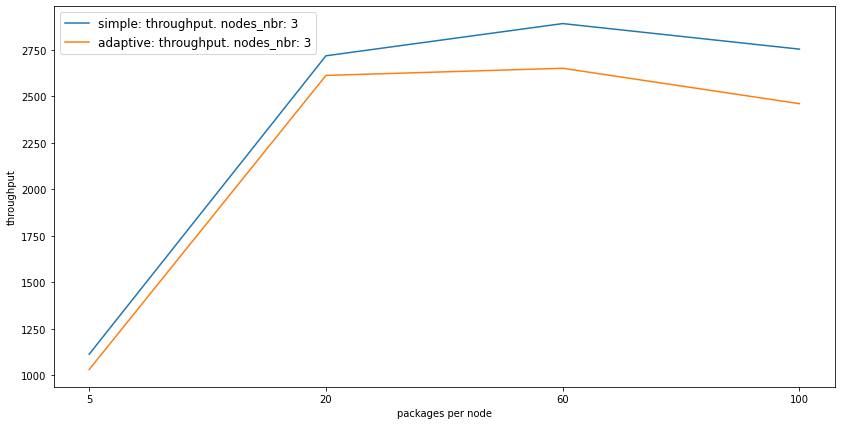

In [101]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-linked-queue_3_5_1.csv',
    'data/token-ring-linked-queue_3_20_1.csv',
     'data/token-ring-linked-queue_3_60_1.csv',
    'data/token-ring-linked-queue_3_100_1.csv'],
    ['data/token-ring-linked-queue_3_5_15.csv',
    'data/token-ring-linked-queue_3_20_60.csv',
     'data/token-ring-linked-queue_3_60_180.csv',
     'data/token-ring-linked-queue_3_100_300.csv']
],'throughput', True, ['simple', 'adaptive'])

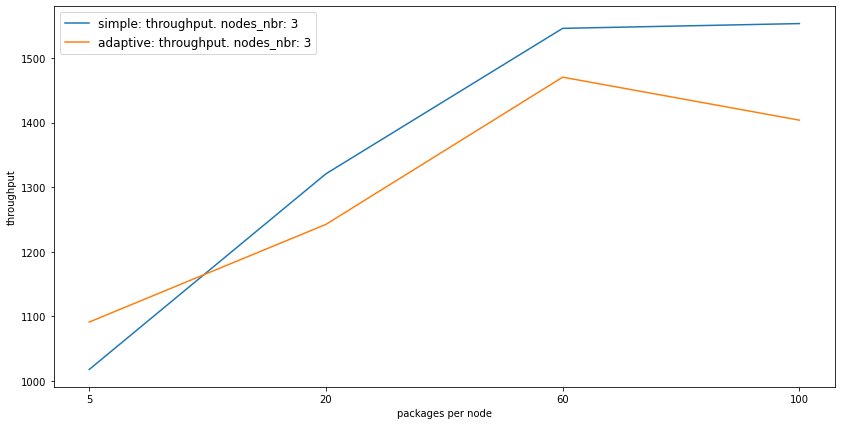

In [106]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_3_20_1.csv',
     'data/token-ring-test_3_60_1.csv',
    'data/token-ring-test_3_100_1.csv'],
    ['data/token-ring-test_3_5_15.csv',
    'data/token-ring-test_3_20_60.csv',
     'data/token-ring-test_3_60_180.csv',
     'data/token-ring-test_3_100_300.csv']
],'throughput', True, ['simple', 'adaptive'])

### Сравнение с process_per_time = total packet number / node number

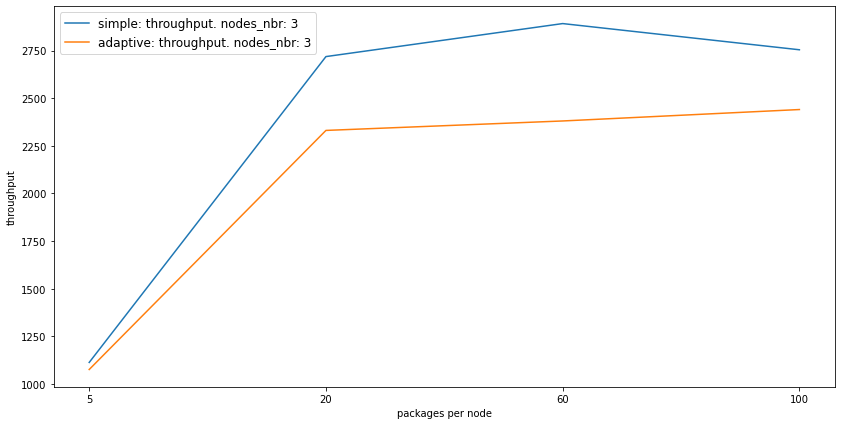

In [107]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-linked-queue_3_5_1.csv',
    'data/token-ring-linked-queue_3_20_1.csv',
     'data/token-ring-linked-queue_3_60_1.csv',
    'data/token-ring-linked-queue_3_100_1.csv'],
    ['data/token-ring-linked-queue_3_5_5.csv',
    'data/token-ring-linked-queue_3_20_20.csv',
     'data/token-ring-linked-queue_3_60_60.csv',
     'data/token-ring-linked-queue_3_100_100.csv']
],'throughput', True, ['simple', 'adaptive'])

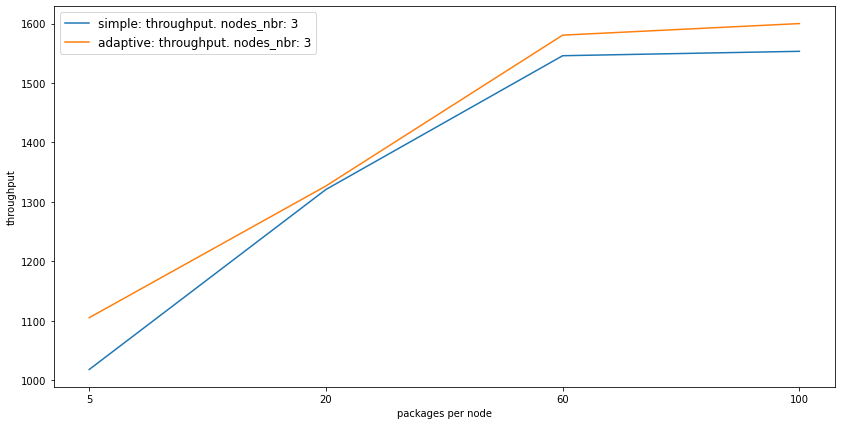

In [108]:
plotAverageStatsByPacketNumber([
    ['data/token-ring-test_3_5_1.csv',
    'data/token-ring-test_3_20_1.csv',
     'data/token-ring-test_3_60_1.csv',
    'data/token-ring-test_3_100_1.csv'],
    ['data/token-ring-test_3_5_5.csv',
    'data/token-ring-test_3_20_20.csv',
     'data/token-ring-test_3_60_60.csv',
     'data/token-ring-test_3_100_100.csv']
],'throughput', True, ['simple', 'adaptive'])